In [44]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Carga de Datos

Nota: A partir del c13 al c18 son duplicados

In [45]:

conjuntoImgs = []
conjuntoGris = []
conjuntoBin = []
y = []

for i in range(1, 19):
    for j in range(10):
        ruta = f'Prueba/C{i}/N{j}.JPG'
        temp = cv2.imread(ruta)

        temp = cv2.resize(temp, (32, 64))
        conjuntoImgs.append(temp)
        
        temp_gris = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
        conjuntoGris.append(temp_gris)
        
        _, temp_bin = cv2.threshold(temp_gris, 127, 1, cv2.THRESH_BINARY)
        conjuntoBin.append(temp_bin)
    
        match(j):
            case 0: y.append([1,0,0,0,0,0,0,0,0,0])
            case 1: y.append([0,1,0,0,0,0,0,0,0,0])
            case 2: y.append([0,0,1,0,0,0,0,0,0,0])
            case 3: y.append([0,0,0,1,0,0,0,0,0,0])
            case 4: y.append([0,0,0,0,1,0,0,0,0,0])
            case 5: y.append([0,0,0,0,0,1,0,0,0,0])
            case 6: y.append([0,0,0,0,0,0,1,0,0,0])
            case 7: y.append([0,0,0,0,0,0,0,1,0,0])
            case 8: y.append([0,0,0,0,0,0,0,0,1,0])
            case 9: y.append([0,0,0,0,0,0,0,0,0,1])

# Convertir las listas en arrays de numpy
conjuntoImgs = np.array(conjuntoImgs)
conjuntoGris = np.array(conjuntoGris)
conjuntoBin = np.array(conjuntoBin)
y = np.array(y)
# conjuntoImgs = np.array(conjuntoImgs).reshape(1,1105920)
# conjuntoGris = np.array(conjuntoGris).reshape(1,368640)
# conjuntoBin = np.array(conjuntoBin).reshape(1,368640)


# Imprimir las formas de los arrays para confirmar
print("Tamaño de conjuntoImgs:", conjuntoImgs.shape)
print("Tamaño de conjuntoGris:", conjuntoGris.shape)
print("Tamaño de conjuntoBin:", conjuntoBin.shape)
print("Tamaño de y:", y.shape)



Tamaño de conjuntoImgs: (180, 64, 32, 3)
Tamaño de conjuntoGris: (180, 64, 32)
Tamaño de conjuntoBin: (180, 64, 32)
Tamaño de y: (180, 10)


### Declaración de funciones

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función de activación
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Feedforward
def f_forward(x, w1, w2):
    # Capa oculta
    z1 = x.dot(w1)  # Entrada
    a1 = sigmoid(z1)  # Activación de la capa oculta
    
    # Capa de salida
    z2 = a1.dot(w2)  # Entrada
    a2 = sigmoid(z2)  # Salida
    return a2

# Generar pesos aleatorios
def generate_wt(x, y):
    return np.random.randn(x, y)

# Cálculo de la pérdida
def loss(out, Y):
    s = np.square(out - Y)
    return np.sum(s) / len(Y)

# Backpropagation
def back_prop(x, Y, w1, w2, alpha):
    # Capa oculta
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    
    # Capa de salida
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    
    # Gradiente de salida
    d2 = a2 - Y
    d1 = np.multiply((w2.dot(d2.T)).T, np.multiply(a1, 1 - a1))
    
    # Ajustes de pesos
    w1_adj = x.T.dot(d1)
    w2_adj = a1.T.dot(d2)
    
    w1 -= alpha * w1_adj
    w2 -= alpha * w2_adj
    
    return w1, w2

def train(x, Y, w1, w2, alpha=0.01, epoch=10):
    acc = []
    losses = []
    for j in range(epoch):
        epoch_losses = []
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            epoch_losses.append(loss(out, Y[i]))
            w1, w2 = back_prop(x[i], Y[i], w1, w2, alpha)
        epoch_loss = sum(epoch_losses) / len(x)
        accuracy = (1 - epoch_loss) * 100
        print(f"Epoch {j + 1} ======== Loss: {epoch_loss:.4f} ======== Accuracy: {accuracy:.2f}%")
        acc.append(accuracy)
        losses.append(epoch_loss)
    return acc, losses, w1, w2

# Predicción
def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)
    k = np.argmax(Out)  # Índice del valor máximo
    classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
    print(f"Image is of letter {classes[k]}.")
    plt.imshow(x.reshape(64, 32), cmap='gray')
    plt.show()


### Partición de los datos

In [47]:
X_train_RGB, X_test_RGB, Y_train_RGB, Y_test_RGB = train_test_split(conjuntoImgs, y, test_size = 0.2)
X_train_Gris, X_test_Gris, Y_train_Gris, Y_test_Gris = train_test_split(conjuntoGris, y, test_size = 0.2)
X_train_Bin, X_test_Bin, Y_train_Bin, Y_test_Bin = train_test_split(conjuntoBin, y, test_size = 0.2)

X_train_RGB = X_train_RGB.reshape(144, 1, -1)  
X_test_RGB = X_test_RGB.reshape(36, 1, -1)  
Y_train_RGB = Y_train_RGB.reshape(144, 1, -1)
Y_test_RGB = Y_test_RGB.reshape(36, 1, -1)

X_train_Gris = X_train_Gris.reshape(144, 1, -1)  
X_test_Gris = X_test_Gris.reshape(36, 1, -1)  
Y_train_Gris = Y_train_RGB.reshape(144, 1, -1)
Y_test_Gris = Y_test_RGB.reshape(36, 1, -1)

X_train_Bin = X_train_Bin.reshape(144, 1, -1)  
X_test_Bin = X_test_Bin.reshape(36, 1, -1)
Y_train_Bin = Y_train_RGB.reshape(144, 1, -1)
Y_test_Bin = Y_test_RGB.reshape(36, 1, -1)  

In [48]:

# Imprimir las formas de las variables
print("Shape de X_train_RGB:", X_train_RGB.shape)
print("Shape de X_test_RGB:", X_test_RGB.shape)

print("Shape de X_train_Gris:", X_train_Gris.shape)
print("Shape de X_test_Gris:", X_test_Gris.shape)

print("Shape de X_train_Bin:", X_train_Bin.shape)
print("Shape de X_test_Bin:", X_test_Bin.shape)

Shape de X_train_RGB: (144, 1, 6144)
Shape de X_test_RGB: (36, 1, 6144)
Shape de X_train_Gris: (144, 1, 2048)
Shape de X_test_Gris: (36, 1, 2048)
Shape de X_train_Bin: (144, 1, 2048)
Shape de X_test_Bin: (36, 1, 2048)


### Generación de los pesos

In [49]:
w1_RGB = generate_wt(6144, 5)
w2_RGB = generate_wt(5, 10)
print(w1_RGB, "\n\n", w2_RGB)

[[-0.36408535 -1.64689298  0.67494063 -1.17816015 -0.03897263]
 [ 0.19089496 -0.22803095  1.96041259  1.77780398  0.1605149 ]
 [ 1.29669228  0.36547312 -0.18838196  1.14242503  0.50568878]
 ...
 [-0.60081065 -1.85421957  0.47260987  0.87021787  0.9537388 ]
 [-0.7076415  -0.57904394 -0.86238356 -0.07500776  0.5155304 ]
 [-0.82323706  0.48299597 -1.24088386 -0.18661263 -0.32736186]] 

 [[-0.53366665 -1.41536252 -0.82814775 -0.61785241 -0.85474006  0.34366313
  -0.27165594  0.53475671  2.04512627  0.74494314]
 [ 0.15320549 -0.33144205 -0.00686159 -1.59021344  0.02539204 -1.58595405
   1.15332673  0.48017357 -0.90689242 -0.7658122 ]
 [ 2.54327812 -0.50243227 -0.10730843  0.83515552 -0.06639647  1.99919199
   0.01789401 -0.51625262 -0.62921374  1.04956131]
 [-0.99268913 -1.39527054 -1.72063602 -0.26128079 -0.69887943 -0.83106416
   1.68385722 -0.92743495 -0.4339866   0.51261276]
 [ 0.25704293  0.39864784 -0.16495587 -0.07329087 -1.25117079 -0.02902195
  -0.04644755  1.16018583  0.22613698  

In [50]:
w1_Gris = generate_wt(2048, 5)
w2_Gris = generate_wt(5, 10)
print(w1_Gris, "\n\n", w2_Gris)

[[ 1.55401633  1.61907725  0.90543657 -0.12403963 -0.61980306]
 [ 1.58936051 -1.41818389  2.11881334  0.29013737  0.63253322]
 [ 0.91726782 -0.76958995  1.01878323 -0.19133824  0.38239663]
 ...
 [ 1.2261136   1.56856113 -0.32251973  0.38867367 -0.67815545]
 [-2.05080663 -0.67178389  0.09240662 -0.78771332 -0.89586591]
 [ 1.39428008  0.62820114  0.60557031 -0.39155119  0.34437545]] 

 [[ 0.40549533  0.35530991  0.88398577 -0.51530907  1.06375903  1.47614702
  -0.55332524 -1.69153912  0.24756491  2.34287841]
 [-0.22861025 -0.02486047 -0.40551364  0.4575742   0.63999585 -1.1643034
  -0.25062372 -0.00795306 -1.20770574 -1.95110753]
 [-0.98459745  2.2422391   0.85636219  1.41029189  0.77391385  0.74758614
   1.20228754  0.73759265 -1.31402064 -0.00751529]
 [ 1.08973824  1.26095457  1.48488317  1.10517762 -0.49893767  0.90008829
  -0.28685753 -0.04597006 -0.51157598  0.61873577]
 [ 0.35663884  0.11434502 -0.64558252  0.49388716  0.8469188  -1.0845332
   0.81360113 -0.12206209 -0.70893557  0.

In [51]:
w1_Bin = generate_wt(2048, 5)
w2_Bin = generate_wt(5, 10)
print(w1_Bin, "\n\n", w2_Bin)

[[-7.37672143e-01 -1.11119500e+00 -3.30448781e-01 -7.99487201e-01
  -1.42118130e+00]
 [ 2.19302054e+00 -2.27480531e-01 -7.15142811e-01  2.22645497e+00
   1.95248895e+00]
 [-1.47210216e+00  1.09488483e+00  2.63254819e+00  3.05593517e-01
  -2.20249417e-01]
 ...
 [ 9.96374332e-01  2.35719738e-01 -3.35276190e-01 -1.18584200e+00
   1.07607585e-01]
 [-8.91584133e-01 -1.29004617e+00  6.80747980e-01 -1.51226426e+00
   6.03266396e-01]
 [ 6.10052367e-01 -8.91681615e-01 -2.04434877e-03 -9.94300265e-01
  -9.60181838e-01]] 

 [[-0.95893215  1.05998698  0.19676736 -0.51330315  0.63943621  0.69367116
   1.8219479  -1.69411127  0.54699326  1.74765518]
 [-0.42914261  0.31581152 -0.09095153 -0.99602609  1.19876491 -0.40065641
   0.17021785 -0.42099285  1.53239035  2.03745592]
 [-0.90830659  0.25524265 -0.9048707  -0.23005701 -0.1331457   0.62383127
  -0.07439292  0.61630751 -2.21918305 -0.1709489 ]
 [-0.66009659 -0.28537553  0.72583112 -0.40096141  0.26749754 -0.90707296
  -1.71785061 -0.98139939  0.812

### Entrenamiento de las redes

##### RBG

In [52]:
acc_RGB, losss_RGB, w1_RGB, w2_RGB = train(X_train_RGB, Y_train_RGB, w1_RGB, w2_RGB, 0.1, 10)

Epoch 1 ======== Loss: 0.9317 ======== Accuracy: 6.83%


C:\Users\abiab\AppData\Local\Temp\ipykernel_29296\2640888872.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 2 ======== Loss: 0.7388 ======== Accuracy: 26.12%
Epoch 3 ======== Loss: 0.6946 ======== Accuracy: 30.54%
Epoch 4 ======== Loss: 0.6632 ======== Accuracy: 33.68%
Epoch 5 ======== Loss: 0.6402 ======== Accuracy: 35.98%
Epoch 6 ======== Loss: 0.6231 ======== Accuracy: 37.69%
Epoch 7 ======== Loss: 0.6100 ======== Accuracy: 39.00%
Epoch 8 ======== Loss: 0.5999 ======== Accuracy: 40.01%
Epoch 9 ======== Loss: 0.5918 ======== Accuracy: 40.82%
Epoch 10 ======== Loss: 0.5853 ======== Accuracy: 41.47%


##### Escala de Grises

In [53]:
acc_Gris, losss_Gris, w1_Gris, w2_Gris = train(X_train_Gris, Y_train_Gris, w1_Gris, w2_Gris, 0.1, 10)

Epoch 1 ======== Loss: 1.4915 ======== Accuracy: -49.15%
Epoch 2 ======== Loss: 0.9209 ======== Accuracy: 7.91%
Epoch 3 ======== Loss: 0.9095 ======== Accuracy: 9.05%


C:\Users\abiab\AppData\Local\Temp\ipykernel_29296\2640888872.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 4 ======== Loss: 0.9064 ======== Accuracy: 9.36%
Epoch 5 ======== Loss: 0.9044 ======== Accuracy: 9.56%
Epoch 6 ======== Loss: 0.9030 ======== Accuracy: 9.70%
Epoch 7 ======== Loss: 0.9019 ======== Accuracy: 9.81%
Epoch 8 ======== Loss: 0.9010 ======== Accuracy: 9.90%
Epoch 9 ======== Loss: 0.9004 ======== Accuracy: 9.96%
Epoch 10 ======== Loss: 0.8999 ======== Accuracy: 10.01%


##### Binario

In [54]:
acc_Bin, losss_Bin, w1_Bin, w2_Bin = train(X_train_Bin, Y_train_Bin, w1_Bin, w2_Bin, 0.1, 10)

Epoch 1 ======== Loss: 1.0925 ======== Accuracy: -9.25%
Epoch 2 ======== Loss: 0.9146 ======== Accuracy: 8.54%
Epoch 3 ======== Loss: 0.9147 ======== Accuracy: 8.53%
Epoch 4 ======== Loss: 0.9147 ======== Accuracy: 8.53%
Epoch 5 ======== Loss: 0.9147 ======== Accuracy: 8.53%
Epoch 6 ======== Loss: 0.9147 ======== Accuracy: 8.53%
Epoch 7 ======== Loss: 0.9147 ======== Accuracy: 8.53%
Epoch 8 ======== Loss: 0.9147 ======== Accuracy: 8.53%
Epoch 9 ======== Loss: 0.9147 ======== Accuracy: 8.53%
Epoch 10 ======== Loss: 0.9147 ======== Accuracy: 8.53%


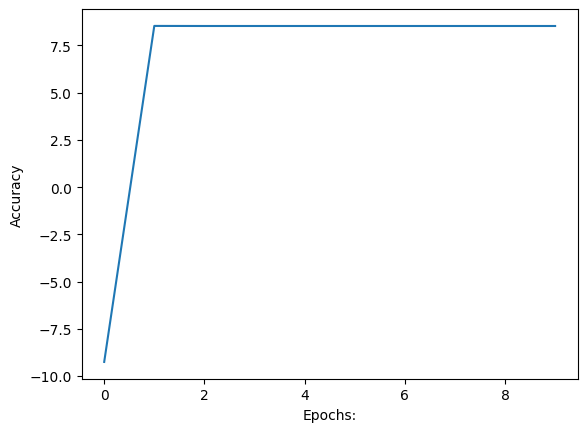

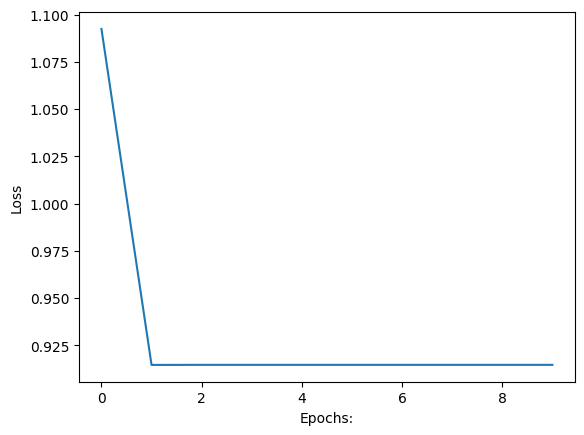

In [55]:
plt.plot(acc_Bin)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt.show()

# plotting Loss
plt.plot(losss_Bin)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.show()

In [56]:
predict(X_test_Bin[10], w1_Bin, w2_Bin)
X_test_Bin[20].shape

Image is of letter 6.


ValueError: cannot reshape array of size 2048 into shape (5,6)

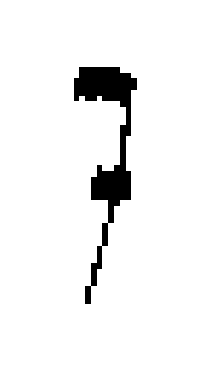

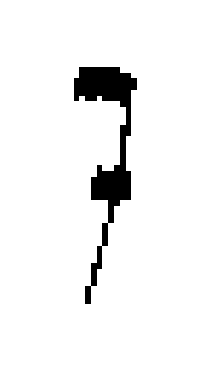

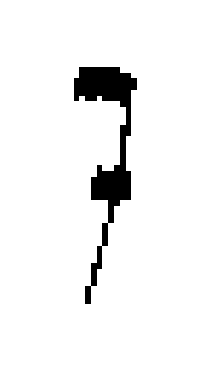

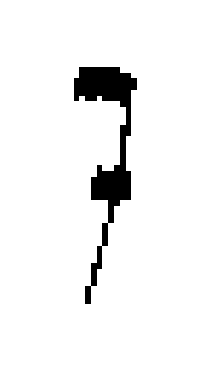

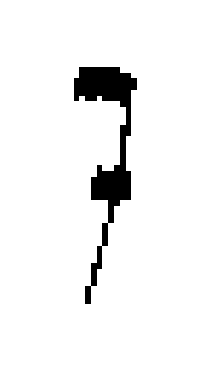

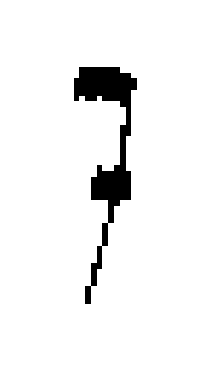

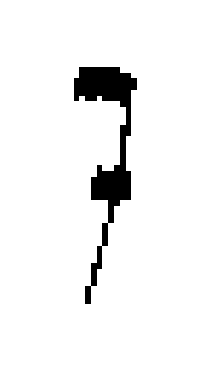

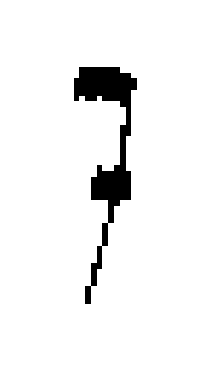

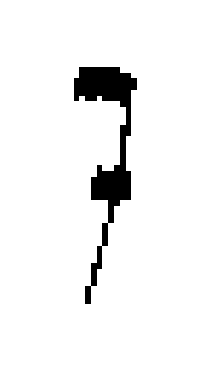

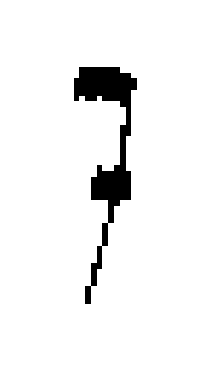

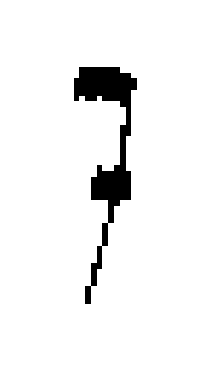

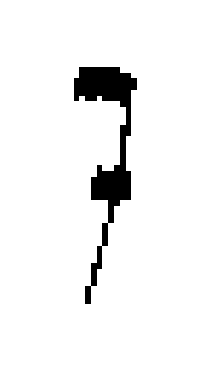

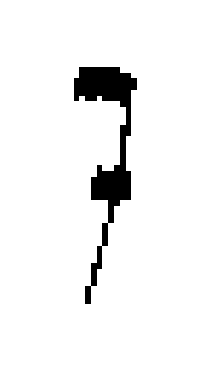

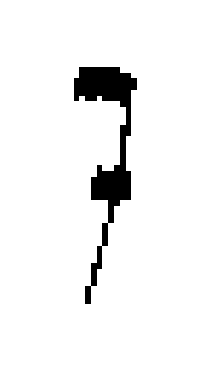

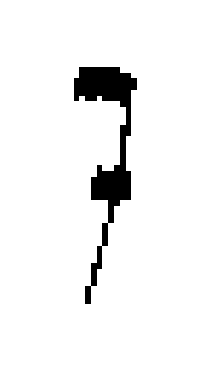

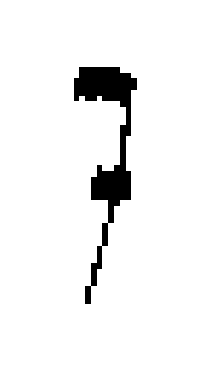

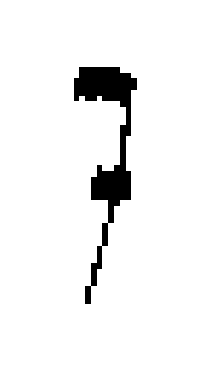

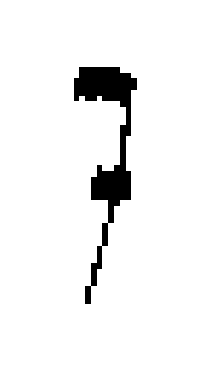

In [ ]:
for i,j in zip(conjuntoBin, y):
        
    if j == 7:
        plt.figure()  # Crear una nueva figura
        plt.imshow(i.reshape(64, 32), cmap='gray')  # Mostrar la imagen
        plt.axis('off')

plt.show()